In [1]:
# import relevant libraries
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data into a pandas dataframe
crime_df = pd.read_csv("dataset/crime.csv", encoding = "ISO-8859-1")

In [4]:
# get the dimension of the dataframe
crime_df.shape

(319073, 17)

In [5]:
# get the fields
crime_df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [6]:
# get the information about the dataframe
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [7]:
# check if the data contains NULL values
crime_df.isnull().sum().any()
# True, meaning there are NULL values

True

In [8]:
# get the value count of 'SHOOTING' column
crime_df['SHOOTING'].value_counts()

Y    1019
Name: SHOOTING, dtype: int64

In [9]:
# drop a column from the dataframe
updated_crimedf = crime_df.drop(['SHOOTING'], axis=1)

In [10]:
# check columns
updated_crimedf.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location'],
      dtype='object')

In [11]:
# drop the rows where at least one element is missing
cleaned_crimedf = updated_crimedf.dropna()

In [12]:
# check the new dimension of the dataframe
cleaned_crimedf.shape

(296573, 16)

In [13]:
# import datetime
from datetime import datetime

# convert string to timestamp
cleaned_crimedf["OCCURRED_ON_DATE"] = cleaned_crimedf["OCCURRED_ON_DATE"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [14]:
# split OCCURRED_ON_DATE into date and time
cleaned_crimedf['DATE'] = [d.date() for d in cleaned_crimedf['OCCURRED_ON_DATE']]
cleaned_crimedf['TIME'] = [d.time() for d in cleaned_crimedf['OCCURRED_ON_DATE']]

In [15]:
# Extract the Year-Month combination from the 'OCCURRED_ON_DATE' using 'dt.to_period' function.
# Where 'D', 'M' and 'Y' are the inputs.
# Here, 'OCCURRED_ON_DATE' should be in the datetime format.
cleaned_crimedf['YEAR_MONTH'] = pd.to_datetime(cleaned_crimedf['OCCURRED_ON_DATE']).dt.to_period('M')

In [16]:
# display first five fields
cleaned_crimedf.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DATE,TIME,YEAR_MONTH
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02,13:00:00,2018-09
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21,00:00:00,2018-08
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03,19:27:00,2018-09
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03,21:16:00,2018-09
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03,21:05:00,2018-09


In [17]:
# assign the cleaned dataframe to crimedf
crimedf = cleaned_crimedf

## Number of Crimes for each Offense Code Group

In [18]:
# get the unique OFFENSE CODE GROUPs
crimedf.OFFENSE_CODE_GROUP.unique()

array(['Larceny', 'Vandalism', 'Towed', 'Investigate Property',
       'Motor Vehicle Accident Response', 'Auto Theft', 'Verbal Disputes',
       'Robbery', 'Fire Related Reports', 'Other', 'Property Lost',
       'Assembly or Gathering Violations', 'Larceny From Motor Vehicle',
       'Medical Assistance', 'Residential Burglary', 'Simple Assault',
       'Restraining Order Violations', 'Violations', 'Harassment',
       'Ballistics', 'Property Found', 'Police Service Incidents',
       'Disorderly Conduct', 'Property Related Damage',
       'Missing Person Reported', 'Investigate Person', 'Fraud',
       'Drug Violation', 'Aggravated Assault',
       'License Plate Related Incidents', 'Firearm Violations',
       'Other Burglary', 'Arson', 'Warrant Arrests', 'Bomb Hoax',
       'Counterfeiting', 'Liquor Violation', 'Firearm Discovery',
       'Landlord/Tenant Disputes', 'Missing Person Located',
       'Auto Theft Recovery', 'Service', 'Operating Under the Influence',
       'Confiden

In [19]:
# get the count of distinct OFFESE_CODE_GROUPs
crimedf.OFFENSE_CODE_GROUP.unique().shape

(63,)

In [20]:
# get the number of crimes for each OFFENSE_CODE_GROUP
crime_count_by_type = pd.DataFrame(crimedf.groupby('OFFENSE_CODE_GROUP').size().sort_values(ascending=False).rename('COUNT').reset_index())

In [21]:
# display the dataframe
crime_count_by_type.head(10)

,OFFENSE_CODE_GROUP,COUNT
0,Motor Vehicle Accident Response,30385
1,Larceny,25070
2,Medical Assistance,22373
3,Investigate Person,17973
4,Other,17028
5,Simple Assault,14852
6,Vandalism,14846
7,Drug Violation,14396
8,Verbal Disputes,12947
9,Towed,10736


In [22]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

[Text(0, 0, 'Motor Vehicle Accident Response'),
 Text(0, 0, 'Larceny'),
 Text(0, 0, 'Medical Assistance'),
 Text(0, 0, 'Investigate Person'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Simple Assault'),
 Text(0, 0, 'Vandalism'),
 Text(0, 0, 'Drug Violation'),
 Text(0, 0, 'Verbal Disputes'),
 Text(0, 0, 'Towed'),
 Text(0, 0, 'Investigate Property'),
 Text(0, 0, 'Larceny From Motor Vehicle'),
 Text(0, 0, 'Property Lost'),
 Text(0, 0, 'Warrant Arrests'),
 Text(0, 0, 'Aggravated Assault'),
 Text(0, 0, 'Fraud'),
 Text(0, 0, 'Residential Burglary'),
 Text(0, 0, 'Violations'),
 Text(0, 0, 'Missing Person Located'),
 Text(0, 0, 'Auto Theft'),
 Text(0, 0, 'Robbery'),
 Text(0, 0, 'Harassment'),
 Text(0, 0, 'Missing Person Reported'),
 Text(0, 0, 'Property Found'),
 Text(0, 0, 'Confidence Games'),
 Text(0, 0, 'Police Service Incidents'),
 Text(0, 0, 'Disorderly Conduct'),
 Text(0, 0, 'Fire Related Reports'),
 Text(0, 0, 'License Violation'),
 Text(0, 0, 'Restraining Order Violations'),
 Text(0, 0, 'Firea

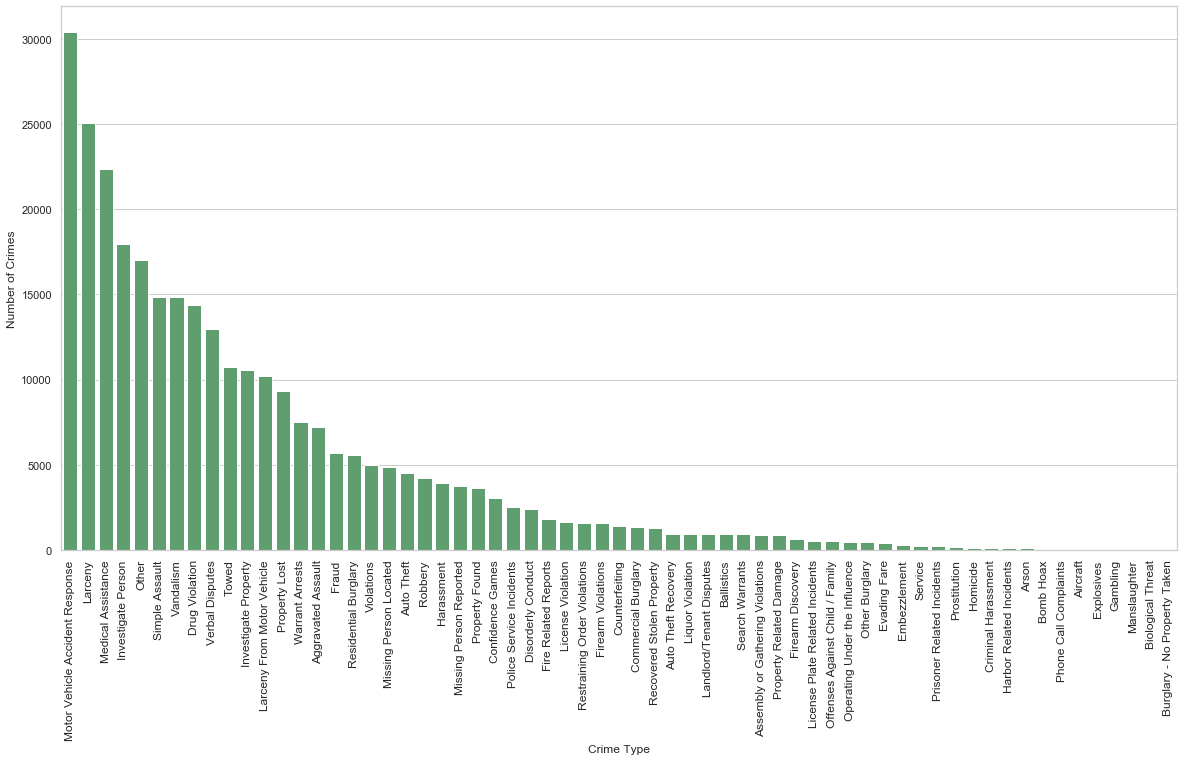

In [23]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

# plot the graph of number of crimes vs. OFFENSE_CODE_GROUP
# all types of OFFENSE_CODE_GROUP types will be plotted
barplot_alltypes = sns.barplot(x="OFFENSE_CODE_GROUP", y="COUNT", data=crime_count_by_type, color="g")
# set the axis labels
ax.set(ylabel="Number of Crimes", xlabel="Crime Type")
# rotate xticklabels
barplot_alltypes.set_xticklabels(barplot_alltypes.get_xticklabels(),
                        rotation=90,
                        fontweight='light',
                        fontsize='large'
                        )

In [24]:
# get the COUNT of 'Burglary - No Property Taken'
crime_count_by_type[crime_count_by_type['OFFENSE_CODE_GROUP']=='Burglary - No Property Taken']

,OFFENSE_CODE_GROUP,COUNT
62,Burglary - No Property Taken,2


In [25]:
# import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [26]:
# create a new dataframe to store year, offense_code_group, and number of crimes
crimedf_new = pd.DataFrame(crimedf.groupby(['YEAR','OFFENSE_CODE_GROUP']).size().sort_values(ascending=False).rename('COUNT').reset_index())

In [27]:
# display the dataframe
crimedf_new.head()

,YEAR,OFFENSE_CODE_GROUP,COUNT
0,2017,Motor Vehicle Accident Response,9606
1,2016,Motor Vehicle Accident Response,9318
2,2016,Larceny,7597
3,2017,Larceny,7541
4,2017,Medical Assistance,7390


## Crime Trend Over Years (for all OFFENSE_CODE_GROUPs)

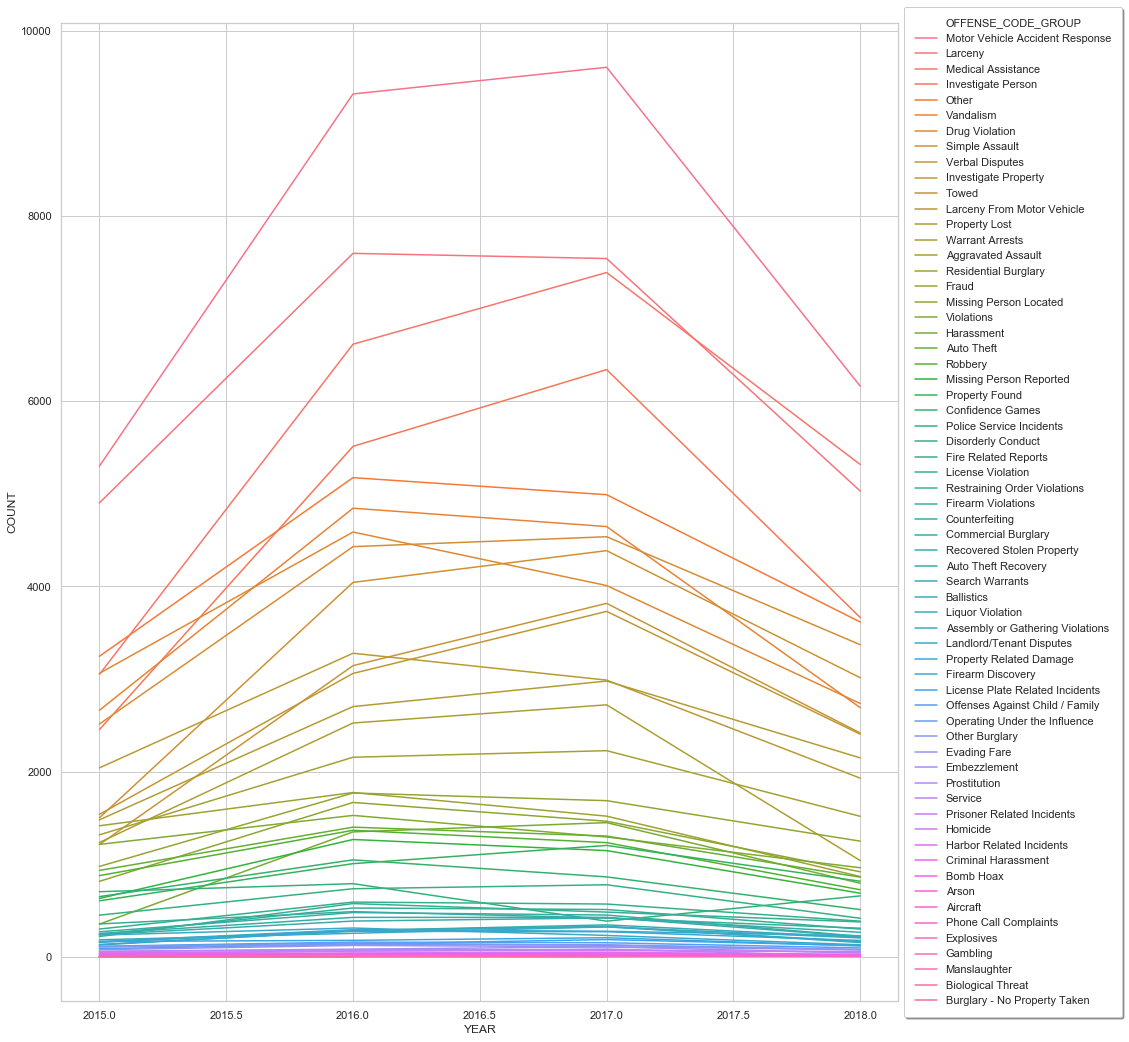

In [28]:
# plot the crime trend over YEARs
plt.figure(figsize=(15, 18))
ax = sns.lineplot(x='YEAR', 
                  y='COUNT', 
                  hue='OFFENSE_CODE_GROUP', 
                  data=crimedf_new).legend(loc='center left', 
                                           bbox_to_anchor=(1, 0.5), 
                                           fancybox=True, 
                                           shadow=True, 
                                           borderpad=1)

## Map Number of Crimes with Offense Code Group and Year-Month (HEATMAP)

In [29]:
# create a new dataframe to store year_month, offense_code_group, and number of crimes
crimedf_by_year_month = pd.DataFrame(crimedf.groupby(['YEAR_MONTH', 'OFFENSE_CODE_GROUP']).size().rename('COUNT').reset_index())

In [30]:
# display the dataframe
crimedf_by_year_month.head()

,YEAR_MONTH,OFFENSE_CODE_GROUP,COUNT
0,2015-06,Aggravated Assault,121
1,2015-06,Arson,1
2,2015-06,Assembly or Gathering Violations,14
3,2015-06,Auto Theft,66
4,2015-06,Auto Theft Recovery,8


In [31]:
# get the information about the dataframe
crimedf_by_year_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 3 columns):
YEAR_MONTH            2259 non-null period[M]
OFFENSE_CODE_GROUP    2259 non-null object
COUNT                 2259 non-null int64
dtypes: int64(1), object(1), period[M](1)
memory usage: 53.1+ KB


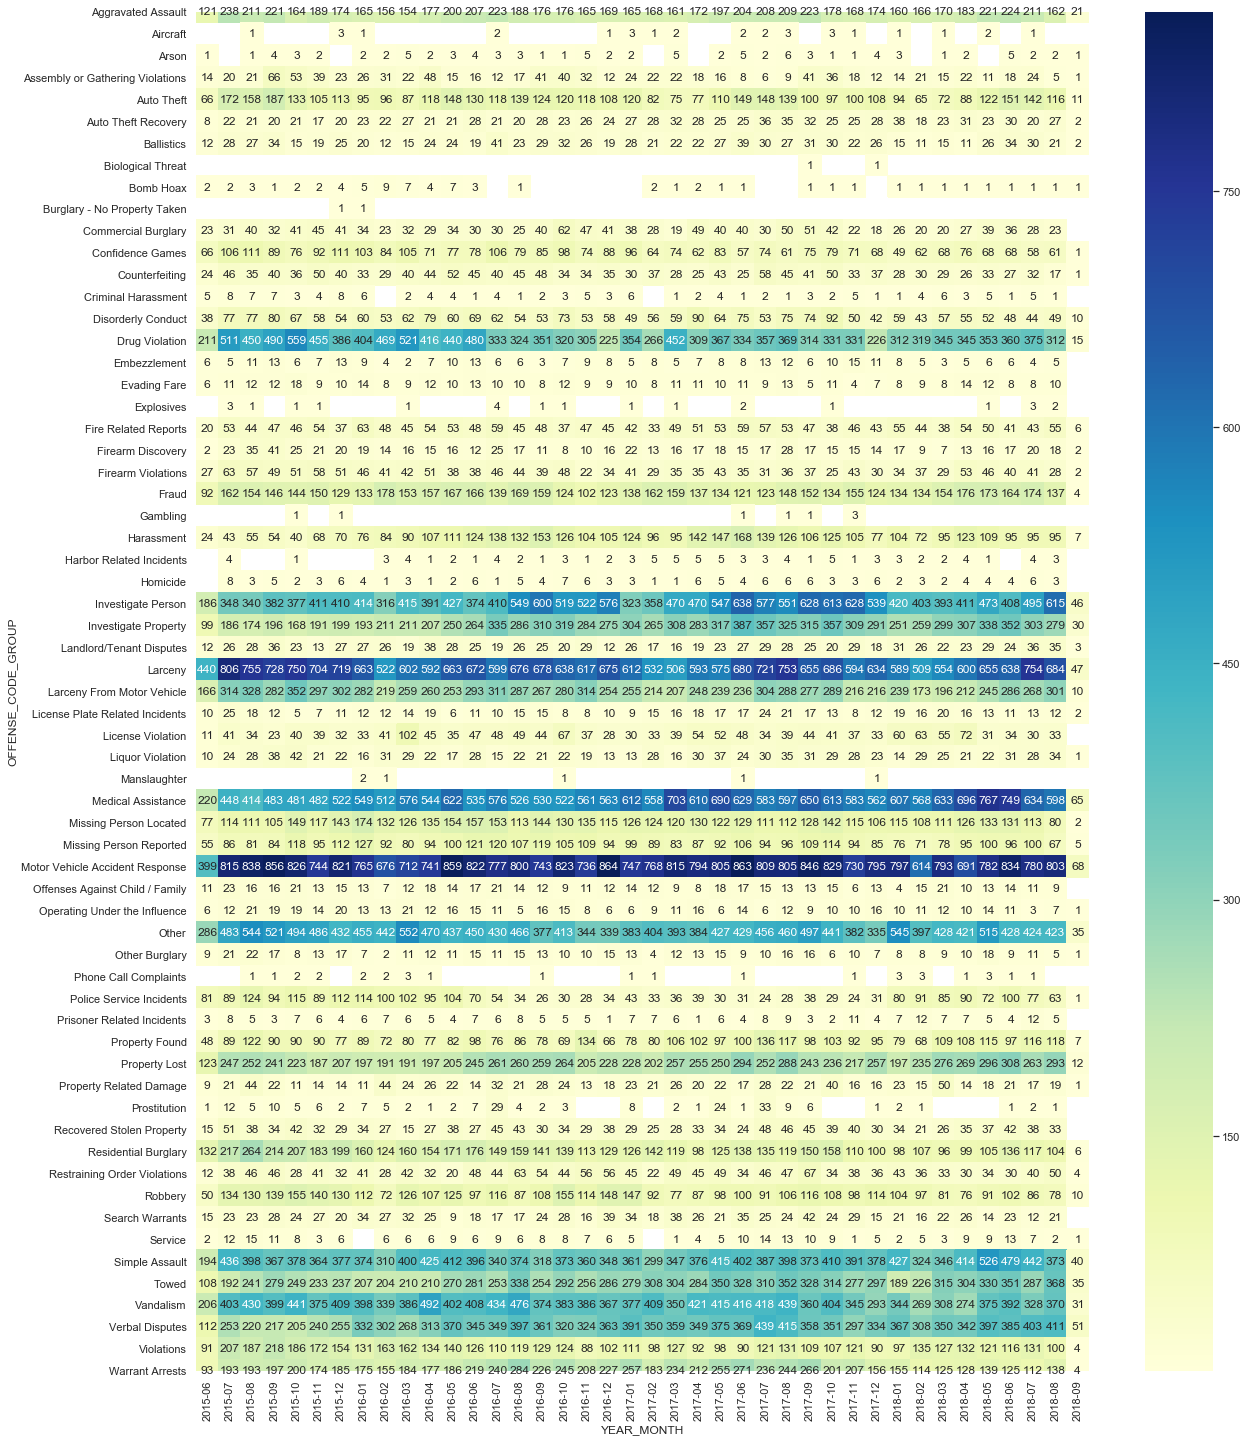

In [32]:
# plot the heatmap to represent the number of crimes over offense_code_group and year_month
crimes = crimedf_by_year_month.pivot("OFFENSE_CODE_GROUP", "YEAR_MONTH", "COUNT")
plt.figure(figsize=(20, 25))
ax1 = sns.heatmap(crimes, annot=True, fmt=".0f" ,cmap="YlGnBu")